# 2. Entrenamiento de RNNs en una Serie de Tiempo

a) Carga de Datos
--

In [54]:
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
import matplotlib.pyplot as plt

In [57]:
def create_data(name_f):
    dataframe = pandas.read_csv(name_f, sep=',', usecols=[1], engine='python', skipfooter=3)
    dataframe[:] = dataframe[:].astype('float32')
    df_train, df_test = dataframe[0:96].values, dataframe[96:].values
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(df_train)
    stream_train_scaled = scaler.transform(df_train)
    stream_test_scaled = scaler.transform(df_test)
    return scaler, list(stream_train_scaled), list(stream_test_scaled)

scaler, train_set, test_set = create_data('international-airline-passengers.csv')

b) Transformación en dos arreglos
--

In [58]:
def create_dataset(dataset, lag=1):
    data_X = []
    data_Y = []
    for i in range(lag, len(dataset)):
        data_X.append(dataset[i - lag : i])
        data_Y.append(dataset[i])
    return np.array(data_X), np.array(data_Y)

Se puede ver que la función "create_dataset" se inicializa lag con un valor default 1, sin embargo al darle un número distinto, este cambia.

c) Creación de los conjuntos de prueba y test
--

In [98]:
lag = 3
train_X, train_Y = create_dataset(train_set,lag)
test_X, test_Y = create_dataset(test_set,lag)

d) Transformación a 3 dimensiones
--

In [99]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

e) Entrenamiento de una LSTM
--

In [100]:
model = Sequential()
model.add(LSTM(4, input_shape=(None, lag), activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
5s - loss: 0.0494
Epoch 2/100
0s - loss: 0.0163
Epoch 3/100
0s - loss: 0.0123
Epoch 4/100
0s - loss: 0.0115
Epoch 5/100
0s - loss: 0.0106
Epoch 6/100
0s - loss: 0.0100
Epoch 7/100
0s - loss: 0.0096
Epoch 8/100
0s - loss: 0.0094
Epoch 9/100
0s - loss: 0.0092
Epoch 10/100
0s - loss: 0.0089
Epoch 11/100
0s - loss: 0.0090
Epoch 12/100
0s - loss: 0.0086
Epoch 13/100
0s - loss: 0.0085
Epoch 14/100
0s - loss: 0.0086
Epoch 15/100
0s - loss: 0.0084
Epoch 16/100
0s - loss: 0.0082
Epoch 17/100
0s - loss: 0.0082
Epoch 18/100
0s - loss: 0.0081
Epoch 19/100
0s - loss: 0.0080
Epoch 20/100
0s - loss: 0.0082
Epoch 21/100
0s - loss: 0.0079
Epoch 22/100
0s - loss: 0.0076
Epoch 23/100
0s - loss: 0.0077
Epoch 24/100
0s - loss: 0.0078
Epoch 25/100
0s - loss: 0.0076
Epoch 26/100
0s - loss: 0.0075
Epoch 27/100
0s - loss: 0.0074
Epoch 28/100
0s - loss: 0.0072
Epoch 29/100
0s - loss: 0.0071
Epoch 30/100
0s - loss: 0.0073
Epoch 31/100
0s - loss: 0.0071
Epoch 32/100
0s - loss: 0.0070
Epoch 33/100
0s -

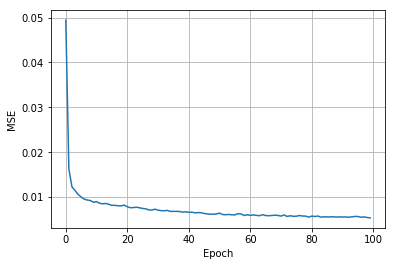

0.0053702211284


In [101]:
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(hist.epoch, hist.history['loss'])
plt.grid(True)
plt.show()
print(min(hist.history['loss']))

f) Predicciones para Test y Train
--

In [102]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)

g) RMSE sobre Test y Train
--

In [103]:
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.85 RMSE
Test Score: 54.41 RMSE


h) Gráficos de Predicciones de Test y Train con el tiempo original
--

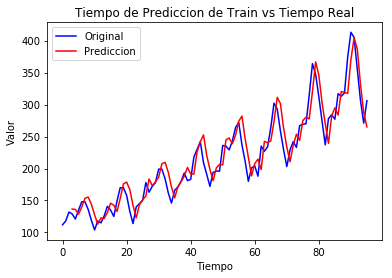

In [104]:
plt.plot(range(len(train_set)), scaler.inverse_transform(train_set), 'b')
plt.plot(range(len(train_set))[lag:], list(trainPredict), 'r')
plt.title('Tiempo de Prediccion de Train vs Tiempo Real')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend(['Original', 'Prediccion'], loc='best')
plt.show()

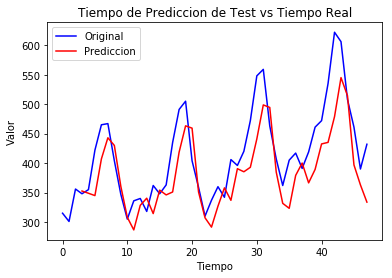

In [105]:
plt.plot(range(len(test_set)), scaler.inverse_transform(test_set), 'b')
plt.plot(range(len(test_set))[lag:], list(testPredict), 'r')
plt.title('Tiempo de Prediccion de Test vs Tiempo Real')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend(['Original', 'Prediccion'], loc='best')
plt.show()

i) Número de bloques LSTM usando k-fold
--

Numero de bloques: 4
Error promedio: 24.6477665689


/Users/ricardocarrasco/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/ricardocarrasco/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


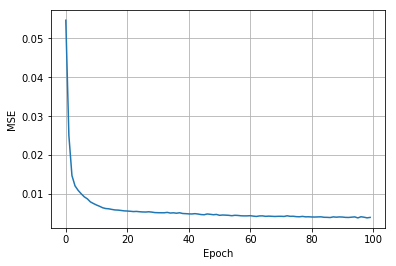

0.00385882226815
Numero de bloques: 6
Error promedio: 23.086639165


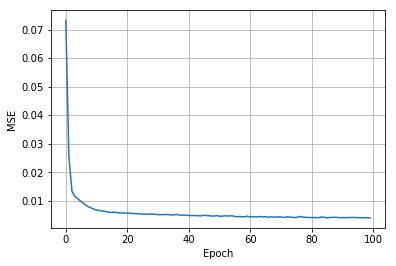

0.00397163575809
Numero de bloques: 8
Error promedio: 22.9042015423


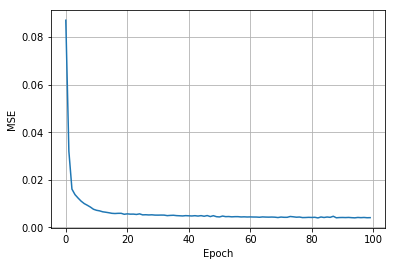

0.00401444460762
Numero de bloques: 10
Error promedio: 22.5406081812


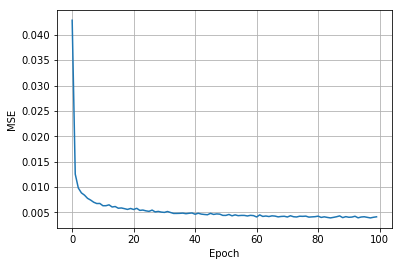

0.0039156811632
Numero de bloques: 12
Error promedio: 23.2014168962


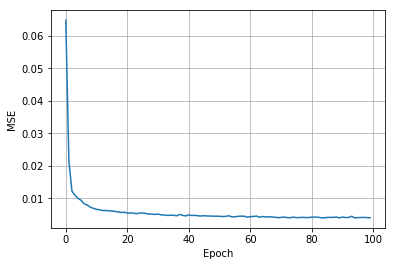

0.00398966320278


In [67]:
train_X, train_Y = create_dataset(train_set, lag)
test_X, test_Y = create_dataset(test_set, lag)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Se definen los folds a utilizar
kfold = cross_validation.KFold(train_X.shape[0], 5)

# Se determina el tiempo y error de entrenamiento para cada cantidad de bloques posible
for nb in range(4, 13, 2):
    cv_errors = []
    times = []
    print 'Numero de bloques:', nb
    for i, (train, val) in enumerate(kfold):
        model = None
        model = Sequential()
        model.add(LSTM(nb, input_shape=(None, lag), activation='tanh', recurrent_activation='sigmoid'))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        hist = model.fit(train_X[train], train_Y[train], epochs=100, batch_size=1, verbose=0)
        trainPredict_val = model.predict(train_X[val])
        trainPredict_val = scaler.inverse_transform(trainPredict_val)
        trainY_val = scaler.inverse_transform(train_Y[val])
        error = math.sqrt(mean_squared_error(trainY_val, trainPredict_val))
        cv_errors.append(error)
    mean_time = np.mean(times)
    mse_cv = np.mean(cv_errors)
    print 'Error promedio:', mse_cv
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.plot(hist.epoch, hist.history['loss'])
    plt.grid(True)
    plt.show()
    print(min(hist.history['loss']))

j) Variando lag de 1 a 4 
--

Con un Lag de 1.00 :


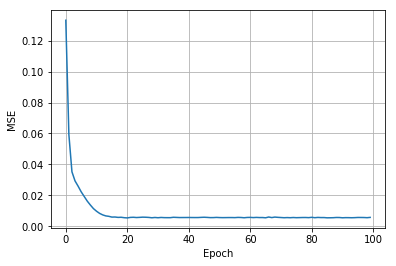

0.00548461750178
Train Score: 22.79 RMSE
Test Score: 51.01 RMSE

Con un Lag de 2.00 :


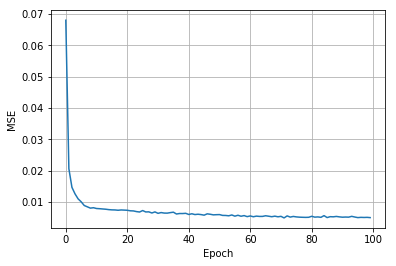

0.0048630268584
Train Score: 21.43 RMSE
Test Score: 52.05 RMSE

Con un Lag de 3.00 :


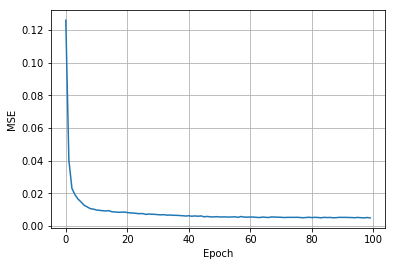

0.0049377786618
Train Score: 21.61 RMSE
Test Score: 58.66 RMSE

Con un Lag de 4.00 :


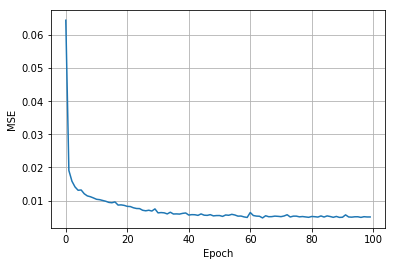

0.00478188762162
Train Score: 21.23 RMSE
Test Score: 60.20 RMSE



In [70]:
for lag in range(1, 5):
    train_X, train_Y = create_dataset(train_set, lag)
    test_X, test_Y = create_dataset(test_set, lag)
    train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
    model = Sequential()
    model.add(LSTM(10, input_shape=(None, lag), activation='tanh', recurrent_activation='sigmoid'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    hist = model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)
    
    trainPredict = model.predict(train_X)
    testPredict = model.predict(test_X)
    trainPredict = scaler.inverse_transform(trainPredict)
    train_Y = scaler.inverse_transform(train_Y)
    testPredict = scaler.inverse_transform(testPredict)
    test_Y = scaler.inverse_transform(test_Y)
    trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
    testScore = math.sqrt(mean_squared_error(test_Y, testPredict))
    
    print( 'Con un Lag de %.2f :' % (lag))
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.plot(hist.epoch, hist.history['loss'])
    plt.grid(True)
    plt.show()
    print(min(hist.history['loss']))
    print('Train Score: %.2f RMSE' % (trainScore))
    print('Test Score: %.2f RMSE\n' % (testScore))

Se puede ver que el Train Score se mantiene a medida que se aumenta el lag, sin embargo el Test Score aumenta significativamente a medida que el lag aumenta.

k) Comparacion de LSTM, SimpleRNN y GRU
--

In [73]:
lag = 3
train_X, train_Y = create_dataset(train_set, lag)
test_X, test_Y = create_dataset(test_set, lag)
   
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

Con un Lag de 3.00 :


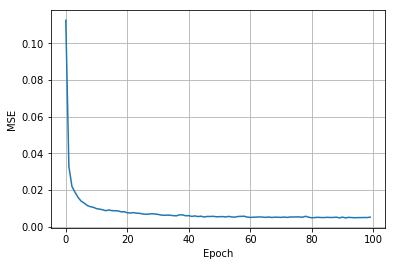

0.00486500884306
Train Score: 222.04 RMSE
Test Score: 373.09 RMSE



In [74]:
model = Sequential()
model.add(GRU(10, input_shape=(None, lag), recurrent_initializer='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore = math.sqrt(mean_squared_error(testY, testPredict))

print( 'Con un Lag de %.2f :' % (lag))
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(hist.epoch, hist.history['loss'])
plt.grid(True)
plt.show()
print(min(hist.history['loss']))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

In [75]:
lag = 3
train_X, train_Y = create_dataset(train_set, lag)
test_X, test_Y = create_dataset(test_set, lag)
   
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

Con un Lag de 3.00 :


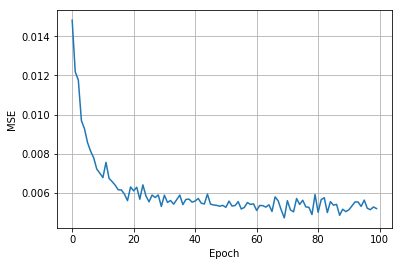

0.00472241076168
Train Score: 21.69 RMSE
Test Score: 63.06 RMSE



In [76]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(None, lag), recurrent_initializer='orthogonal', activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))

print( 'Con un Lag de %.2f :' % (lag))
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(hist.epoch, hist.history['loss'])
plt.grid(True)
plt.show()
print(min(hist.history['loss']))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

No se realizó nuevamente el entrenamiento con LSTM sino que se utilizaron los resultados del item anterior con un lag de 3. De los 3 entrenamientos se puede ver que aquel que tuvo un error menor fue el GRU, sin embargo pagando un precio muy alto en los errores de test y entrenamiento. Si bien el mínimo de los errores corresponde a SimpleRNN, este tiene una inestabilidad muy alta, lo cual no se puede decir que converga de forma notable luego de las 40 epoch.

l) Entrenamiento de LSTM con timestep = 3.
--

Con un Lag de 1.00 :


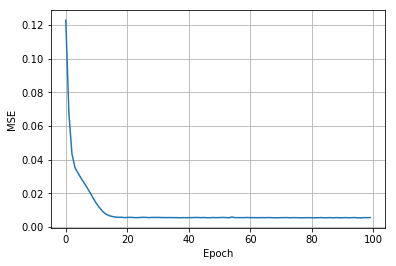

0.00546396139002
Train Score: 22.81 RMSE
Test Score: 52.23 RMSE



In [78]:
lag = 1
train_X, train_Y = create_dataset(train_set, lag)
test_X, test_Y = create_dataset(test_set, lag)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

model = Sequential()
model.add(LSTM(4, input_shape=(None, lag), activation='tanh', recurrent_activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))

print( 'Con un Lag de %.2f :' % (lag))
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.plot(hist.epoch, hist.history['loss'])
plt.grid(True)
plt.show()
print(min(hist.history['loss']))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

Se puede notar que el error no mejora, sin embargo converge de forma muy rápida, mucho más que con un lag de 3. En los errores, el error de Entrenamiento se mantiene por el orden de los 20-23, sin embargo el Test Score baja considerablemente con respecto al lag = 3.

m) Entrenamiento de LSTM con memoria entre batches
--

In [91]:
lag = 1
timestep = 3

train_X, train_Y = create_dataset(train_set, timestep)
test_X, test_Y = create_dataset(test_set, timestep)
   
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], lag))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], lag))

batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, timestep, lag), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
time_c = list()
for i in range(150):
    hist = model.fit(train_X, train_Y, epochs=1, batch_size=batch_size, shuffle=False)
    time_c.append(hist.history['loss'])
    model.reset_states()
print(min(time_c))

trainPredict = model.predict(train_X, batch_size=batch_size)
testPredict = model.predict(test_X, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

Epoch 1/1
93/93 [==============================] - 5s - loss: 0.0227       

Claramente se obtiene una gran mejora en los errores. bajando a un mínimo de 0.00373.
Si bien no se puede obtener un gráfico de forma fácil, es posible ver los resultados y ver que comienzan a converger rápidmaente.

n) Batch de tamaño 3.
--

In [92]:
lag = 1
timestep = 3

train_X, train_Y = create_dataset(train_set, timestep)
test_X, test_Y = create_dataset(test_set, timestep)
   
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], lag))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], lag))

batch_size = 3
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, timestep, lag), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
time_c = list()
for i in range(150):
    hist = model.fit(train_X, train_Y, epochs=1, batch_size=batch_size, shuffle=False)
    time_c.append(hist.history['loss'])
    model.reset_states()
print(min(time_c))

trainPredict = model.predict(train_X, batch_size=batch_size)
testPredict = model.predict(test_X, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

Epoch 1/1
93/93 [==============================] - 4s - loss: 0.0224       
Epoch 1/1
93/93 [==============================] - 0s - loss: 0.0152     

Al aumentar el número de batches se puede ver un error mucho menor que al trabajar con 1 batch o con batches sin memoria. También se puede ver que los RMSE disminuyen considerablemente tanto el Train Score como el Test Score, mejorando mucho la eficiencia para una cantidad de epochs iguales para ambos casos.

o) LSTM apilada
--

In [97]:
lag = 1
timestep = 3

train_X, train_Y = create_dataset(train_set, timestep)
test_X, test_Y = create_dataset(test_set, timestep)
   
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], lag))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], lag))

batch_size = 3

model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, timestep, lag), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, timestep, lag), stateful=True, return_sequences=True))
model.add(LSTM(10, batch_input_shape=(batch_size, timestep, lag), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
time_c = list()
for i in range(300):
    hist = model.fit(train_X, train_Y, epochs=1, batch_size=batch_size, shuffle=False)
    time_c.append(hist.history['loss'])
    model.reset_states()
    
trainPredict = model.predict(train_X, batch_size=batch_size)
testPredict = model.predict(test_X, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
train_Y = scaler.inverse_transform(train_Y)
testPredict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform(test_Y)
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict))

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE\n' % (testScore))

Epoch 1/1
93/93 [==============================] - 7s - loss: 0.0261       

El único cambio de mejoría que se tiene al usar LSTM apilada es en el mínimo error que se obtiene al entrenar la red. También se obtiene una mejora en el error de Train, disminuyendo de aproximadamente 18 a un valor cercano a 14. Por el contrario, el Test Score aumentó casi en el doble.